<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/Forecasting_Time_series_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data =pd.read_csv("/content/BTC_USD_2013-10-01_2021-07-20-CoinDesk.csv",index_col=["Date"],
                            parse_dates=["Date"])

In [2]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
bitcoin_data = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

In [4]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2849 entries, 2013-10-01 to 2021-07-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2849 non-null   float64
dtypes: float64(1)
memory usage: 44.5 KB


In [5]:
import matplotlib.pyplot as plt


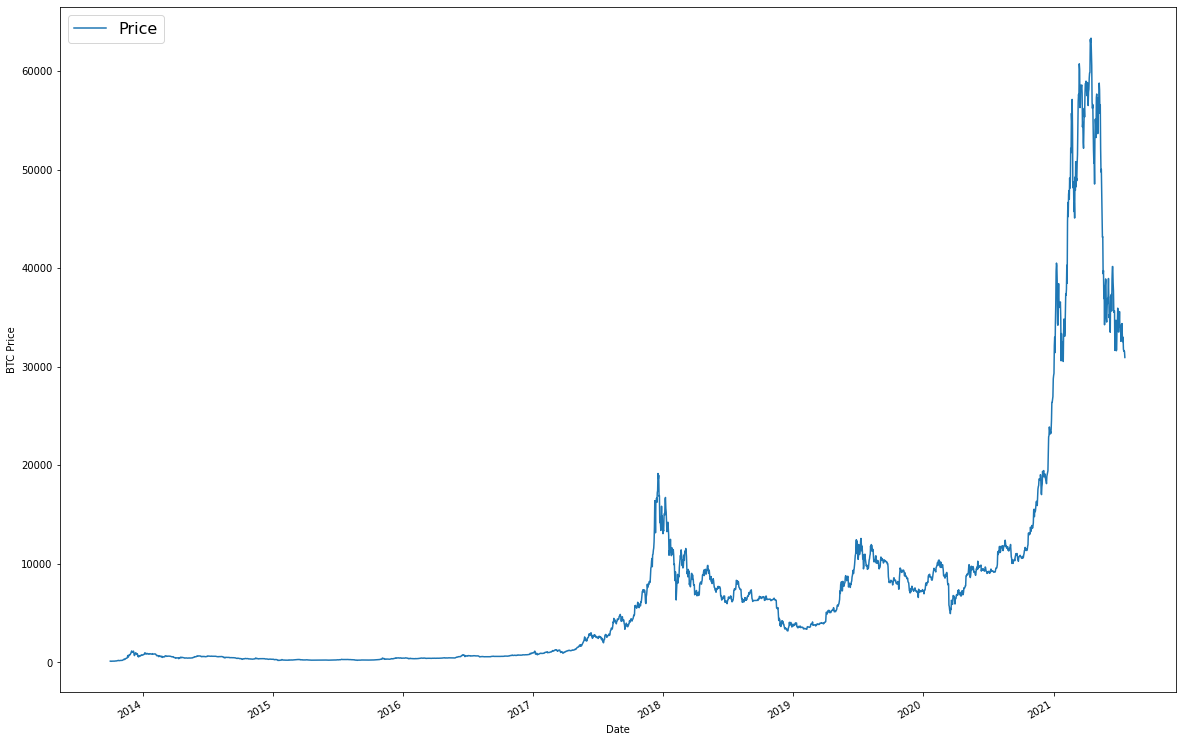

In [6]:
bitcoin_data.plot(figsize=(20,14))
plt.ylabel("BTC Price")
plt.legend(fontsize=16)

#Lets split the data in Train and Test set


In [7]:

bitcoin_data.reset_index(inplace=True)



In [8]:
bitcoin_data.head()

,Date,Price
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [9]:
train_split=int(0.8*len(bitcoin_data))
train_split,len(bitcoin_data)

(2279, 2849)

In [10]:
X_train,y_train=bitcoin_data.Date[:train_split], bitcoin_data.Price[:train_split]
X_test, y_test = bitcoin_data.Date[train_split:], bitcoin_data.Price[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2279, 570, 2279, 570)

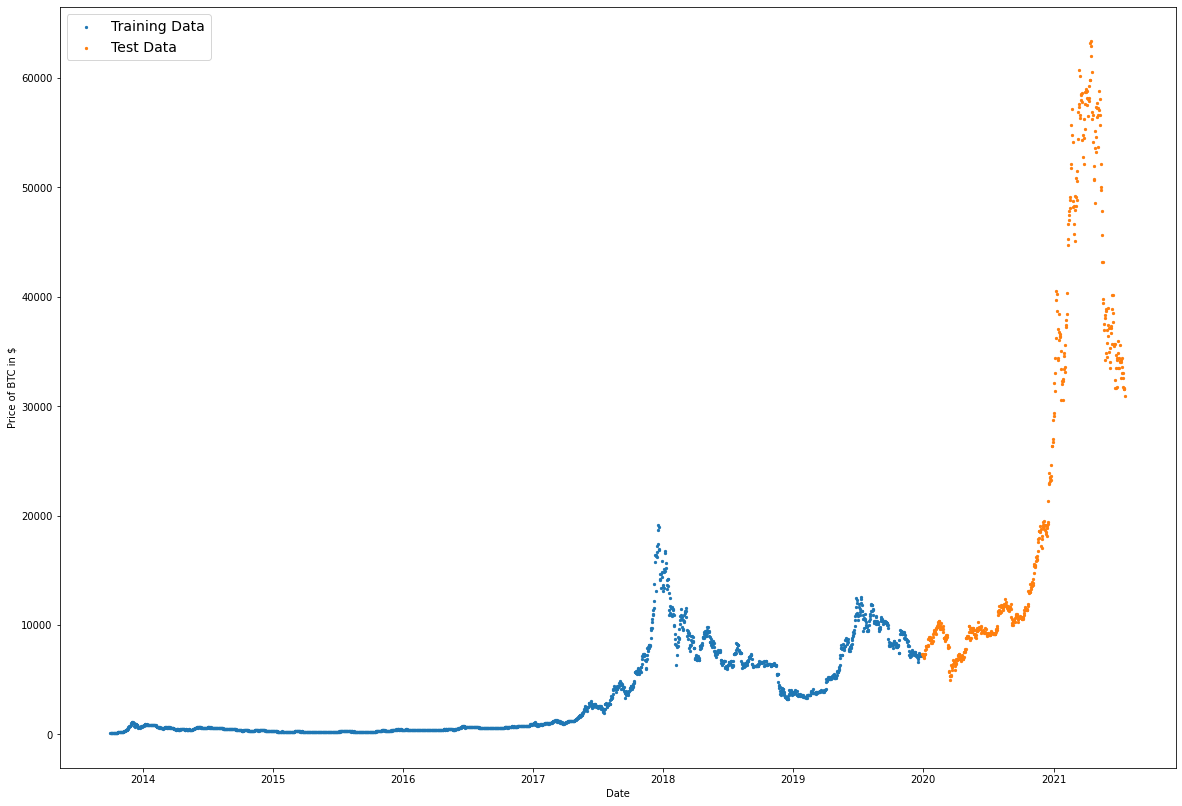

In [12]:
#lets plot the split data to check how it looks.
plt.figure(figsize=(20,14))
plt.scatter(X_train, y_train, s=5, label="Training Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.xlabel("Date")
plt.ylabel("Price of BTC in $")
plt.legend(fontsize=14)
plt.show();

# Let write a helper function to plot time series data 

In [13]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end],format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

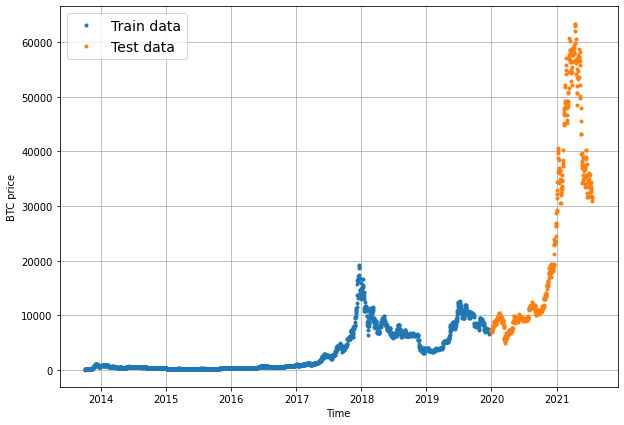

In [14]:
# test the plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train,label="Train data")
plot_time_series(timesteps=X_test, values=y_test,label="Test data")

**Modelling Experiments**

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

0 Naïve model (baseline)

1 Dense model, horizon = 1, window = 7

2 Same as 1, horizon = 1, window = 30

3 Same as 1, horizon = 7, window = 30

4 Conv1D

5 LSTM

6 Same as 1 (but with multivariate data)

7 N-BEATs Algorithm

8 Ensemble (multiple models optimized on different loss 
functions)

9 Future prediction model (model to predict future values)

10 Same as 1 (but with turkey 🦃 data introduced)
Model 0: Naive forecast (baseline)
The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$
In English:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.